In [ ]:
import requests
import json
import time

# Liste pour stocker les produits
produits = []

# Fonction pour récupérer les donnees depuis l'API OpenFoodFacts
def fetch_openfoodfacts_data(barcode):
    url = f"https://world.openfoodfacts.org/api/v0/product/{barcode}.json"
    response = requests.get(url)
    
    if response.status_code == 200:
        data = response.json()
        product_data = data.get("product", {})
        nutriments_data = product_data.get("nutriments", {})
        categories_tags = product_data.get("categories_tags", [])

        # Selection de la categorie en français (ou anglais en fallback)
        selected_category = next((cat for cat in categories_tags if cat.startswith("fr:")), None)
        if not selected_category:
            selected_category = next((cat for cat in categories_tags if cat.startswith("en:")), "N/A")
        
        # Creation du dictionnaire du produit
        produit = {
            "barcode": barcode,
            "Nom": product_data.get("product_name", "N/A"),
            "Categorie": selected_category,  # Categorie principale en français ou anglais
            "Nutriscore": product_data.get("nutrition_grades_tags", ["N/A"])[0],
            "Novascore": product_data.get("nova_groups_tags", ["N/A"])[0],
            "Ecoscore": product_data.get("ecoscore_score", "N/A"),
            "Taux de proteine": nutriments_data.get("proteins_100g", "N/A"),
            "Taux de sucre": nutriments_data.get("sugars_100g", "N/A"),
            "energie (Kcal)": nutriments_data.get("energy-kcal_100g", "N/A"),
        }
        
        # Ajouter le produit à la liste
        produits.append(produit)
    else:
        print(f"Erreur lors de la recuperation des donnees pour le code-barres {barcode} : {response.status_code}")


cheeses=['3073781055016', '3564707128117', '3564700583135', '3596710495979', '3564707090162', '3330410005980', '5010578008044', '3250391819256', '3257986760191', '3222472116851', '3258561429281', '3258561430140', '3258561430447', '3250391651467', '8006207000166', '3228021170039', '3412290028942', '3199241024924', '3417881210706', '3053004000009', '3344001130043', '3417881240529', '3417880721210']
plantbasedfoodsandbeverages=['5411188118121', '8019428006169', '8019428006190', '7613312347447', '3265477983004', '5413110532760', '5601165004640', '3301594002263', '4770107252805', '3700195639104', '3520831330802', '4260654786132', '3460422349854', '8002352211266', '3162050018613', '5400247032911', '3252920048281', '3229820787343', '3560002430016', '3451790016288', '3250392784669', '3229820188744', '3229820795485']
plantbasedfoods=['8019428006169', '7613312347447', '3265477983004', '5413110532760', '3301594002263', '4770107252805', '3700195639104', '3520831330802', '4260654786132', '3460422349854', '8002352211266', '3162050018613', '5400247032911', '3252920048281', '3229820787343', '3560002430016', '3451790016288', '3250392784669', '3229820188744', '3229820795485', '3229820787985', '3273120030944']
snacks=['3425471120311', '0014200183319', '3370077586156', '3770009530002', '8410076481597', '8410525208959', '7622210089908', '4770107252805', '3547561000089', '3395328474389', '8003170042803', '8000500359884', '3279130104217', '3564709196343', '3229820789118', '3700214612125', '3595894795011', '8901063203198', '3256229807112', '7622210722621', '3292590894115', '3336971806066']
meatsandtheirproducts=['3425470014109', '5400247020949', '3302740057472', '0204146023750', '3520837340133', '3270190203636', '2212398013380', '3455570016222', '3369579009515', '26012339', '26067469', '3256477087229', '3256477087328', '3104544015838', '2380856004864', '300000767', '4008460243056', '5060038581594', '20149710', '5060198530111', '3760324452776', '2411222047564']
beverages=['8019428006190', '3770000661491', '4003669016906', '5601165004640', '3124480196262', '3229820787985', '5000281035338', '3578835503647', '7613035552579', '7613038185071', '3229820763989', '3229820129112', '3229820793658', '3124480186584', '3229820783338', '4056489105510', '0049000050110', '3376370157307', '4000177605004', '4000177158326']
meats=['3425470014109', '0204146023750', '3270190203636', '2212398013380', '3455570016222', '3369579009515', '26012339', '26067469', '3256477087229', '3256477087328', '3104544015838', '2380856004864', '20149710', '3254560242159', '3275560745532', '4006259012777', '3760198112011', '3760198112110', '3760198111236', '3760198111052', '3483190012348', '3263480199566', '3384230039571']
fruitsandvegetablesbasedfoods=['3301594002263', '3252920048281', '3248650268112', '4056489487999', '3268387015032', '3359160010013', '3608580012412', '3337730908458', '20622411', '4045178002124', '3502490006847', '5400111321752', '3760121218643', '3184034256774', '2800000001070', '3184034257689', '26061542', '3258561412290', '3258561412382', '20253929', '3184034250888', '4027900108267', '3297760097426']
cerealsandpotatoes=['5413110532760', '3250392784669', '3336971806066', '3154230600305', '7616700011463', '7613037536058', '7613037535693', '7613034932266', '7613036668910', '7613036669498', '7613035544482', '7613032192570', '7613036669146', '7613037059281', '8076800105056', '5000358966305', '5600341930445', '3229820794624', '3229820167398', '3229820788067', '3229820803883', '3229820799803']
meals=['8712429350100', '3425476202043', '3425470201042', '5413110532760', '3252920048281', '5400247020949', '3302740057472', '3229820787343', '3229820188744', '3229820795485', '3229820795447', '3560071174965', '3256220171786', '00193771', '3229820181899', '3229820188751', '3229820795676', '3229820788760', '3359160010013', '20638757', '3523680489783', '3083681141061', '5060038581594', '7640160011398']
biscuitsandcakes=['7622210089908', '3547561000089', '3279130104217', '3229820789118', '8901063203198', '3256229807112', '4008400290829', '3229820788098', '3229820799124', '3229820799131', '7622210449283', '3229820797236', '3229820800462', '3760151011429', '8076809517584', '7622210100917', '3083681141061', '6130015063012', '8003170061972', '0061232202556', '3250390111627', '3250390003977', '3229820794747', '3187670015941']
breakfasts=['3425478313105', '3425478313129', '3425471317094', '3425471317278', '3425471317025', '3425471309082', '3425471312228', '3425477306139', '3425477306276', '3425471312310', '3425471306531', '3520059916093', '3560002430016', '3250392784669', '3560071501570', '7613037536058', '7613037535693', '7613034932266', '7613036668910', '7613036669498', '7613035544482', '7613032192570', '7613036669146', '7613037059281']
fruitsbasedfoods=['3301594002263', '4056489487999', '3268387015032', '3608580012412', '4045178002124', '3502490006847', '5400111321752', '20253929', '3297760097426', '5022374043778', '3252920046034', '3256220275347', '3080920100377', '3068230016823', '3574318601343', '4056489033042', '3760199922855', '3068230010364', '3256229521742', '6132158600369', '3608580109693']
sauces=['8715700115832', '3760103145929', '5420058008141', '0623682113884', '8720182473813', '8710522924327', '8076809574150', '8005121210989', '3033710082919', '3596710284443', '3038359004544', '40882741', '20712952', '3302768100785', '3291960005557', '4901577048234', '3258561140995', '8715035110304', '9556041611138', '3770026895009', '3770026895016', '3330720633859', '9311627610888']
frozenfoods=['8711299021110', '3328859185103', '8714100635674', '8711327489448', '8711327609082', '8711327609648', '3229820188751', '3041091436245', '3270160840205', '4000177158326', '4444515789634', '5027324001235', '3083681141061', '5060038581594', '3450970060899', '5060198530111', '3270160504305', '8711299020939', '3184034256774', '3229820799834', '3184034257689', '3258561412290', '3168930170693']
cocoaanditsproducts = ['3370077586156', '3770009530002', '3395328474389', '8000500359884', '3700214612125', '93685900', '4000415851705', '8445290503206', '7613035898646', '7613035898707', '7613035859098', '7613036431651', '4008400290829', '9002859065392', '5099872009520', '7622201775346', '20090050', '4056489440246', '7001096582152', '4000281332506', '7616500649675', '7622400817410']
fishes= ['20112332', '3394610004174', '3263670001495', '3551610009121', '8411317302114', '3329150420115', '3450970060899', '3276170016708', '0066613106034', '6111255761494', '8059070744125', '3258561221168', '3596710333431', '3501890004354', '3019081238704', '3250391151332', '3251870001445', '3251870001018', '3251870001070', '3251870001162', '3251870001148', '5900344009293', '3701525001257', '3760313531048']
plantbasedspreads= ['3425478313105', '3425478313129', '3425471317094', '3425471317278', '3425471317025', '3425471309082', '3425471312228', '3425477306139', '3425477306276', '3425471312310', '3425471306531', '3560002430016', '3451790016288', '3273120030944', '3560071501570', '8719200012608', '3613042717385', '3229820789620', '0060383640712', '3268387015032', '0068100084238', '3770002953266', '3770002953631']
biscuits= ['7622210089908', '3229820789118', '8901063203198', '3256229807112', '4008400290829', '3229820788098', '3229820799124', '3229820799131', '7622210449283', '3229820797236', '3229820800462', '3760151011429', '8076809517584', '7622210100917', '3083681141061', '6130015063012', '8003170061972', '0061232202556', '3250390111627', '3250390003977', '3229820794747', '3760074418015', '3229820791074', '3229820799650']
fruitbasedbeverages = ['4000177605004', '4000177158326', '54008045', '3258561300702', '5942045340312', '5942045330603', '20253929', '5038862235235', '3222475307843', '8016438002075', '3760294960875', '3760294960783', '3760294960790', '3257988105778', '6957735788861', '3045320104530', '9008700158428', '3760343880062', '5449000120984', '3123340003054', '8410261650104', '3256228399601', '3256228418852']
chocolates= ['3370077586156', '3770009530002', '3395328474389', '8000500359884', '3700214612125', '93685900', '4000415851705', '7613035898646', '7613035898707', '7613035859098', '7613036431651', '9002859065392', '20090050', '4056489440246', '7622400817410', '3263850583117', '27025635', '80941330', '7613036245210', '3514280123566', '8720354672648', '7622201806491', '7622210588272']
chickens= ['2380856004864', '550000020263775', '0217637032087', '3248830002123', '990530101054498104', '0215068118738', '2848592026507', '2155956002405', '3770019467169', '3250391352302', '2239891000006', '2481831062388', '20013394', '3266980677343', '5413110531305', '0213319044287', '0227645032146', '2302832003517', '4061458009843', '2160770008410', '2209678011365', '0213329026761', '3021690025019', '3661112059781']
beeproducts=['3520059916093', '3088540502663', '3258561200781', '3210791353460', '8413812012208', '3335444150309', '3335444133203', '3335440311414', '3335440311513', '3335440311711', '3770001871158', '3760343370013', '3760343370051', '3760343100146', '3760310950392', '3760310950736', '3280201479622', '9780205525522', '3976541125045', '3760313533271', '3347433064320', '4260225780095', '4260096394551', '20436568']
breads = ['3175681140110', '3175681209190', '3228857000838', '7616700011463', '3229820800523', '9002859111013', '3560070341719', '4005195704258', '0250876011413', '5600961113662', '3700152680163', '8008696025712', '8008696026092', '4061458094214', '3251870001490', '3228857000906', '3258561010199', '3760301420842', '3760301420873', '3760301420859', '3760301420866', '3760313530362']
pastas = ['8852018101154', '8712429350407', '8712429350100', '4770107252805', '8008845072970', '8076809583527', '8076800105056', '5031021388971', '9415748007883', '8005121000177', '8005121000405', '3267460030054', '8005121000061', '8005121000122', '0841165156863', '0841165156887', '8005121002096', '0841165157396', '8001665705066', '8076809523714', '8722700153276', '5000118203688', '3564700391914', '3760242979751']
cakes = ['3547561000089', '3279130104217', '4008400290829', '7622210100917', '3760074418015', '3175681219489', '3353630000924', '3760138580085', '3263850576119', '3259426040795', '3259426040801', '3259426043628', '3251515355001', '3701525001011', '4022993045284', '3760154260893', '3596710472796', '3259421505015', '3259426038792', '3259420340112', '3259426039157', '3259426043178', '3259426043086', '3259426043109']
vegetableoils= ['3265477983004', '3265474573000', '8437010369896', '8004123016247', '8004123016230', '8004123002080', '8004123001298', '3700786807042', '3291960005557', '8002470000674', '5412158025050', '3760294960608', '4260355581210', '3375190006277', '5201043112605', '3760301420477', '3760301420378', '3021885000715', '8424536935926', '8008460003670', '4005009103062', '0096619206841', '3760232740033', '3701515200110']

barcodes = cheeses + plantbasedfoodsandbeverages + plantbasedfoods + snacks + meatsandtheirproducts + beverages + meats + fruitsandvegetablesbasedfoods + cerealsandpotatoes + meals + biscuitsandcakes + breakfasts + fruitsbasedfoods + sauces +frozenfoods + cocoaanditsproducts + fishes + plantbasedspreads + biscuits + fruitbasedbeverages + chocolates + chickens + beeproducts + breads + pastas + cakes + vegetableoils

#en:milks  en:canned-vegetables          
# Recuperer les donnees pour chaque code-barres
for barcode in barcodes:
    fetch_openfoodfacts_data(barcode)
    time.sleep(0.5)

# Affichage des donnees recuperees
for produit in produits:
    print(produit)

# Enregistrement des donnees dans un fichier JSON
with open("produits.json", "w", encoding="utf-8") as f:
    json.dump(produits, f, ensure_ascii=False, indent=4)

print("Donnees enregistrees dans 'produits.json'.")



Erreur lors de la récupération des données pour le code-barres 26067469 : 429
Erreur lors de la récupération des données pour le code-barres 3256477087229 : 429
Erreur lors de la récupération des données pour le code-barres 3256477087328 : 429
Erreur lors de la récupération des données pour le code-barres 3104544015838 : 429
Erreur lors de la récupération des données pour le code-barres 3252920048281 : 429
Erreur lors de la récupération des données pour le code-barres 5400247020949 : 429
Erreur lors de la récupération des données pour le code-barres 3302740057472 : 429
Erreur lors de la récupération des données pour le code-barres 3229820787343 : 429
Erreur lors de la récupération des données pour le code-barres 3229820188744 : 429
Erreur lors de la récupération des données pour le code-barres 3229820795485 : 429
Erreur lors de la récupération des données pour le code-barres 3229820795447 : 429
Erreur lors de la récupération des données pour le code-barres 3560071174965 : 429
Erreur lo

In [56]:
import pandas as pd
data = pd.read_json("produits.json")
print("\nDonnées sous forme de tableau :\n")
data.style


Données sous forme de tableau :



,barcode,Nom,Catégorie,Nutriscore,Novascore,Ecoscore,Taux de protéine,Taux de sucre,Énergie (Kcal)
0,3073781055016,Fagotin tradition,en:dairies,d,en:4-ultra-processed-food-and-drink-products,47,20,0.500000,332
1,3564707128117,Ricotta bio 8% Mat. Gr.,en:dairies,c,en:4-ultra-processed-food-and-drink-products,60,8,3,N/A
2,3564700583135,Fromage Le Carre Au Lait Pasterise,en:dairies,d,en:3-processed-foods,44,18,0.500000,319
3,3596710495979,Gouda tranchettes,en:dairies,d,en:3-processed-foods,38,24,0.500000,350
4,3564707090162,Mozzarella x 1,en:dairies,c,en:3-processed-foods,65,18,1,247
5,3330410005980,Edam tranches 200g,en:dairies,d,unknown,35,25,0.500000,316
6,5010578008044,Cottage Cheese With Pineapple,en:dairies,c,unknown,35,9.500000,5.100000,109
7,3250391819256,Le Sainte-Maure - Fromage de chèvre,en:dairies,d,en:3-processed-foods,22,19,0.800000,256
8,3257986760191,Mozarella cossettes cora,en:dairies,d,en:3-processed-foods,40,26,0.600000,312
9,3222472116851,La Raclette en tranches,en:dairies,d,en:3-processed-foods,45,23,0,328


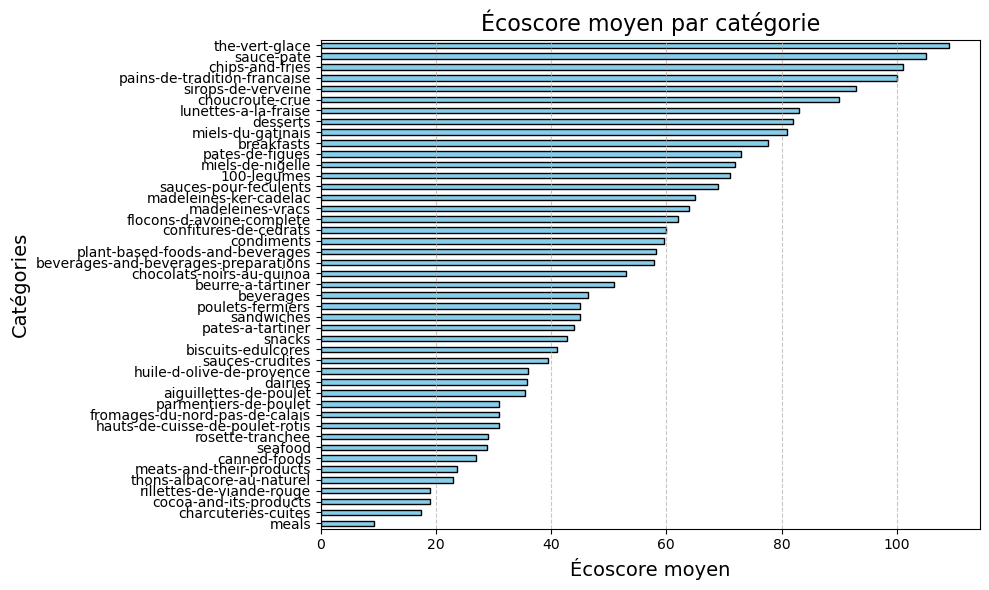

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le fichier JSON
data = pd.read_json("produits.json")

# Convertir l'Ecoscore en numérique, en gérant les valeurs manquantes ou invalides
data["Ecoscore"] = pd.to_numeric(data["Ecoscore"], errors="coerce")

# Extraire la catégorie principale (supprimer les préfixes comme "en:" ou "fr:")
data["Categorie_clean"] = data["Categorie"].str.split(":").str[-1]

# Calculer l'ecoscore moyen par catégorie
ecoscore_moyen = data.groupby("Categorie_clean")["Ecoscore"].mean().dropna()

# Créer le graphe
plt.figure(figsize=(10, 6))
ecoscore_moyen.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Ecoscore moyen par categorie", fontsize=16)
plt.xlabel("Ecoscore moyen", fontsize=14)
plt.ylabel("Categories", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()


<Figure size 1200x800 with 0 Axes>

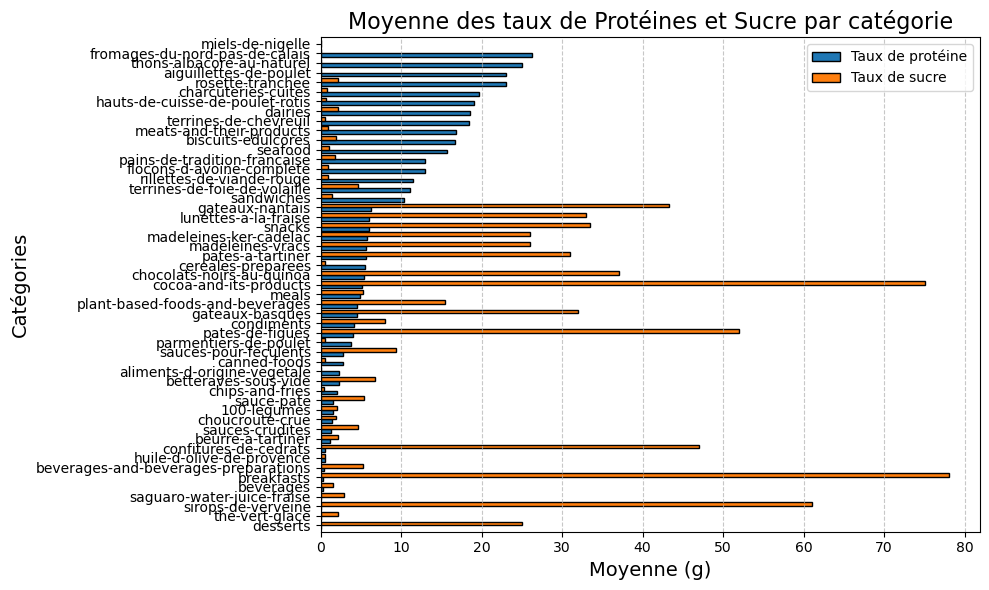

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données depuis le fichier JSON
data = pd.read_json("produits.json")

# Convertir les taux de protéines et de sucre en numériques, en gérant les valeurs manquantes ou invalides
data["Taux de proteine"] = pd.to_numeric(data["Taux de proteine"], errors="coerce")
data["Taux de sucre"] = pd.to_numeric(data["Taux de sucre"], errors="coerce")

# Extraire la catégorie principale (supprimer les préfixes comme "en:" ou "fr:")
data["Categorie_clean"] = data["Categorie"].str.split(":").str[-1]

# Calculer les moyennes des protéines et du sucre par catégorie
moyenne_proteines = data.groupby("Categorie_clean")["Taux de proteine"].mean().dropna()
moyenne_sucre = data.groupby("Categorie_clean")["Taux de sucre"].mean().dropna()

# Créer un DataFrame avec les moyennes des protéines et du sucre
moyennes = pd.DataFrame({
    "Taux de proteine": moyenne_proteines,
    "Taux de sucre": moyenne_sucre
})

# Créer le graphique
plt.figure(figsize=(12, 8))

# Tracer les barres pour les protéines et le sucre
moyennes.sort_values("Taux de proteine").plot(kind="barh", stacked=False, figsize=(10, 6), edgecolor="black", width=0.8)

# Ajouter des titres et labels
plt.title("Moyenne des taux de proteines et Sucre par categorie", fontsize=16)
plt.xlabel("Moyenne (g)", fontsize=14)
plt.ylabel("Categories", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


In [ ]:
data = pd.read_json("produits.json")

# Convertir l'Ecoscore en numérique, en gérant les valeurs manquantes ou invalides
data["Ecoscore"] = pd.to_numeric(data["Ecoscore"], errors="coerce")

# Extraire la catégorie principale (supprimer les préfixes comme "en:" ou "fr:")
data["Categorie_clean"] = data["Categorie"].str.split(":").str[-1]
print("les categories dans notre bdd:", data["Categorie_clean"].unique())

les categories dans notre bdd: ['dairies' 'fromages-du-nord-pas-de-calais'
 'plant-based-foods-and-beverages' 'meals'
 'beverages-and-beverages-preparations' 'beurre-a-tartiner'
 'flocons-d-avoine-complete' 'cereales-preparees' 'snacks'
 'lunettes-a-la-fraise' 'chocolats-noirs-au-quinoa'
 'meats-and-their-products' 'charcuteries-cuites' 'rosette-tranchee'
 'beverages' 'saguaro-water-juice-fraise' 'sirops-de-verveine'
 'terrines-de-foie-de-volaille' 'terrines-de-chevreuil'
 'rillettes-de-viande-rouge' 'betteraves-sous-vide'
 'confitures-de-cedrats' 'choucroute-crue' '100-legumes'
 'biscuits-edulcores' 'breakfasts' 'pates-de-figues' 'condiments'
 'sauce-pate' 'sauces-pour-feculents' 'sauces-crudites' 'desserts'
 'seafood' 'chips-and-fries' 'the-vert-glace' 'cocoa-and-its-products'
 'sandwiches' 'thons-albacore-au-naturel' 'pates-a-tartiner'
 'hauts-de-cuisse-de-poulet-rotis' 'aiguillettes-de-poulet' 'canned-foods'
 'poulets-fermiers' 'parmentiers-de-poulet' 'miels-du-gatinais'
 'miels-de

In [ ]:
import pandas as pd

# Charger les donnees
data = pd.read_json("produits.json")

# Dictionnaire de correspondance entre categories existantes et nouvelles categories
category_map = {
    "dairies": "Produits laitiers",
    "fromages-du-nord-pas-de-calais": "Produits laitiers",
    "beurre-a-tartiner": "Produits laitiers",
    "plant-based-foods-and-beverages": "Aliments vegetaux",
    "meals": "Repas et plats prepares",
    "flocons-d-avoine-complete": "Repas et plats prepares",
    "cereales-preparees": "Repas et plats prepares",
    "beverages-and-beverages-preparations": "Boissons",
    "beverages": "Boissons",
    "snacks": "Snacks et sucreries",
    "chocolats-noirs-au-quinoa": "Snacks et sucreries",
    "lunettes-a-la-fraise": "Snacks et sucreries",
    "meats-and-their-products": "Viandes et produits carnes",
    "charcuteries-cuites": "Viandes et produits carnes",
    "rosette-tranchee": "Viandes et produits carnes",
    "canned-foods": "Conserves",
    "saguaro-water-juice-fraise": "Boissons",
    "sirops-de-verveine": "Boissons",
    "terrines-de-foie-de-volaille": "Viandes et produits carnes",
    "terrines-de-chevreuil": "Viandes et produits carnes",
    "rillettes-de-viande-rouge": "Viandes et produits carnes",
    "betteraves-sous-vide": "Legumes et feculents",
    "confitures-de-cedrats": "Confiserie et produits sucres",
    "choucroute-crue": "Legumes et feculents",
    "100-legumes": "Legumes et feculents",
    "biscuits-edulcores": "Confiserie et produits sucres",
    "breakfasts": "Repas et plats prepares",
    "pates-de-figues": "Confiserie et produits sucres",
    "condiments": "Sauces et epices",
    "sauce-pate": "Sauces et epices",
    "sauces-pour-feculents": "Sauces et epices",
    "sauces-crudites": "Sauces et epices",
    "desserts": "Confiserie et produits sucres",
    "seafood": "Poissons et fruits de mer",
    "chips-and-fries": "Snacks et sucreries",
    "the-vert-glace": "Boissons",
    "cocoa-and-its-products": "Aliments vegetaux",
    "sandwiches": "Repas et plats prepares",
    "thons-albacore-au-naturel": "Poissons et fruits de mer",
    "pates-a-tartiner": "Confiserie et produits sucres",
    "hauts-de-cuisse-de-poulet-rotis": "Viandes et produits carnes",
    "aiguillettes-de-poulet": "Viandes et produits carnes",
    "canned-foods": "Conserves",
    "poulets-fermiers": "Viandes et produits carnes",
    "parmentiers-de-poulet": "Repas et plats prepares",
    "miels-du-gatinais": "Produits sucres",
    "miels-de-nigelle": "Produits sucres",
    "pains-de-tradition-francaise": "Produits cerealiers",
    "aliments-d-origine-vegetale": "Aliments vegetaux",
    "gateaux-nantais": "Confiserie et produits sucres",
    "gateaux-basques": "Confiserie et produits sucres",
    "madeleines-ker-cadelac": "Confiserie et produits sucres",
    "madeleines-vracs": "Confiserie et produits sucres",
    "huile-d-olive-de-provence": "Huiles et graisses"
}

# Appliquer la transformation de la colonne "Categorie" en utilisant le dictionnaire category_map
data["Categorie_clean"] = data["Categorie"].str.split(":").str[-1].map(category_map)

# Verification de la transformation
data.head()


,barcode,Nom,Catégorie,Nutriscore,Novascore,Ecoscore,Taux de protéine,Taux de sucre,Énergie (Kcal),Catégorie_clean
0,3073781055016,Fagotin tradition,en:dairies,d,en:4-ultra-processed-food-and-drink-products,47,20,0.5,332,Produits laitiers
1,3564707128117,Ricotta bio 8% Mat. Gr.,en:dairies,c,en:4-ultra-processed-food-and-drink-products,60,8,3,N/A,Produits laitiers
2,3564700583135,Fromage Le Carre Au Lait Pasterise,en:dairies,d,en:3-processed-foods,44,18,0.5,319,Produits laitiers
3,3596710495979,Gouda tranchettes,en:dairies,d,en:3-processed-foods,38,24,0.5,350,Produits laitiers
4,3564707090162,Mozzarella x 1,en:dairies,c,en:3-processed-foods,65,18,1,247,Produits laitiers


<Figure size 1200x800 with 0 Axes>

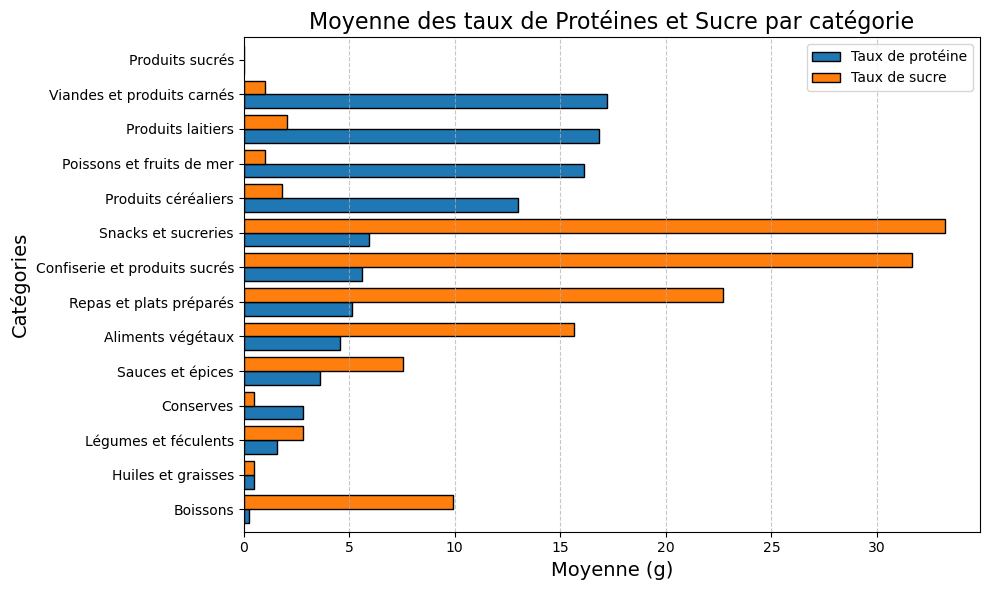

In [ ]:
# Convertir les taux de proteines et de sucre en numeriques, en gerant les valeurs manquantes ou invalides
data["Taux de proteine"] = pd.to_numeric(data["Taux de proteine"], errors="coerce")
data["Taux de sucre"] = pd.to_numeric(data["Taux de sucre"], errors="coerce")

# Calculer les moyennes des proteines et du sucre par categorie
moyenne_proteines = data.groupby("Categorie_clean")["Taux de proteine"].mean().dropna()
moyenne_sucre = data.groupby("Categorie_clean")["Taux de sucre"].mean().dropna()

# Creer un DataFrame avec les moyennes des proteines et du sucre
moyennes = pd.DataFrame({
    "Taux de proteine": moyenne_proteines,
    "Taux de sucre": moyenne_sucre
})

# Creer le graphique
plt.figure(figsize=(12, 8))

# Tracer les barres pour les proteines et le sucre
moyennes.sort_values("Taux de proteine").plot(kind="barh", stacked=False, figsize=(10, 6), edgecolor="black", width=0.8)

# Ajouter des titres et labels
plt.title("Moyenne des taux de Proteines et Sucre par categorie", fontsize=16)
plt.xlabel("Moyenne (g)", fontsize=14)
plt.ylabel("Categories", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


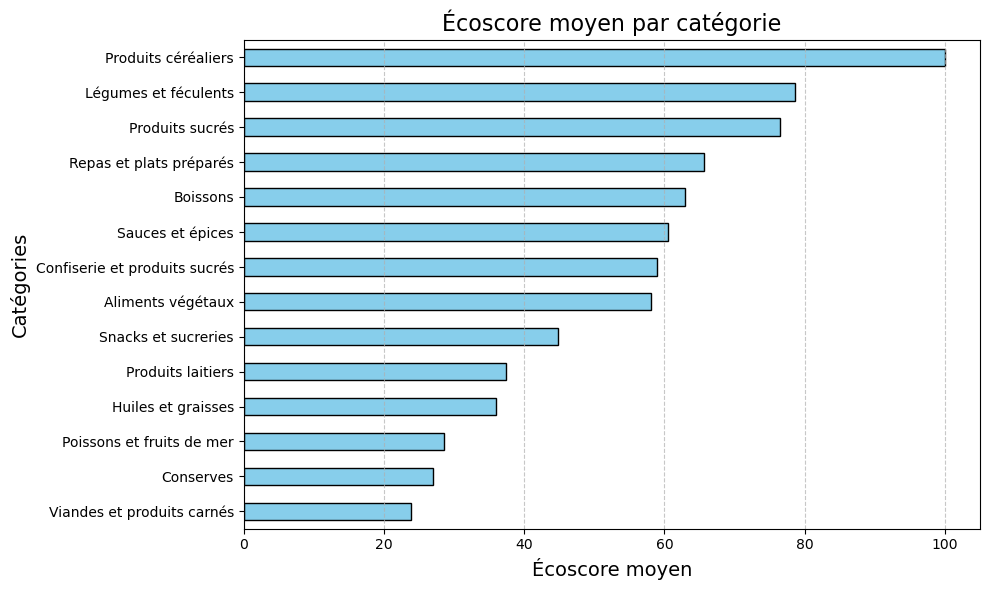

In [ ]:
# Convertir l'Ecoscore en numerique, en gerant les valeurs manquantes ou invalides
data["Ecoscore"] = pd.to_numeric(data["Ecoscore"], errors="coerce")

# Calculer l'ecoscore moyen par categorie
ecoscore_moyen = data.groupby("Categorie_clean")["Ecoscore"].mean().dropna()

# Creer le graphe
plt.figure(figsize=(10, 6))
ecoscore_moyen.sort_values().plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Ecoscore moyen par categorie", fontsize=16)
plt.xlabel("Ecoscore moyen", fontsize=14)
plt.ylabel("Categories", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()

# Afficher le graphique
plt.show()


<Figure size 1200x800 with 0 Axes>

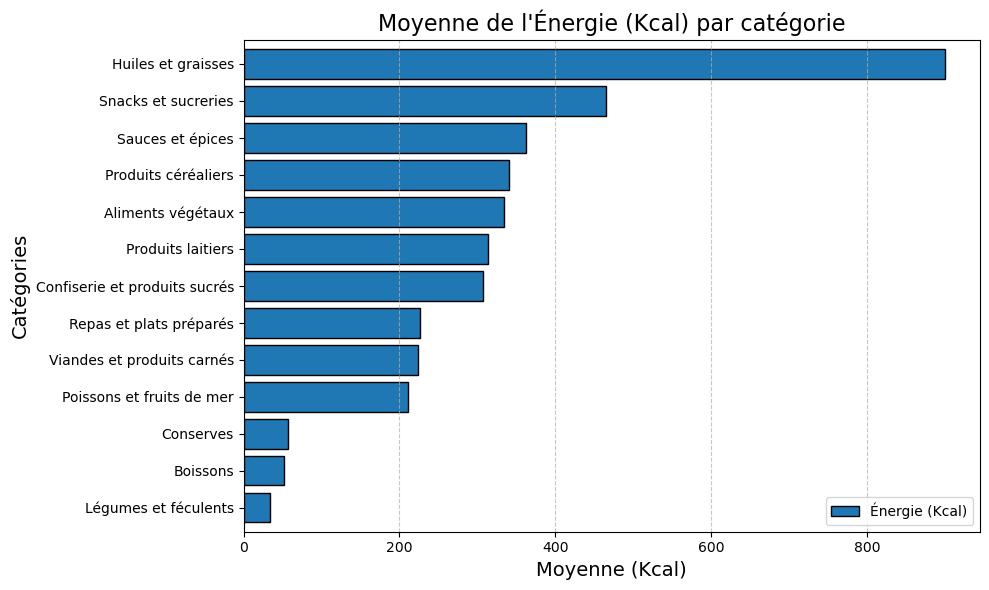

In [ ]:
# Convertir la colonne "Energie (Kcal)" en numerique, en gerant les valeurs manquantes ou invalides
data["Energie (Kcal)"] = pd.to_numeric(data["Energie (Kcal)"], errors="coerce")

# Calculer la moyenne de l'energie par categorie
moyenne_energie = data.groupby("Categorie_clean")["Energie (Kcal)"].mean().dropna()

# Creer un DataFrame avec la moyenne de l'energie
moyennes_energie = pd.DataFrame({
    "Energie (Kcal)": moyenne_energie
})

# Creer le graphique
plt.figure(figsize=(12, 8))

# Tracer les barres pour l'energie
moyennes_energie.sort_values("Energie (Kcal)").plot(kind="barh", stacked=False, figsize=(10, 6), edgecolor="black", width=0.8)

# Ajouter des titres et labels
plt.title("Moyenne de l'Energie (Kcal) par categorie", fontsize=16)
plt.xlabel("Moyenne (Kcal)", fontsize=14)
plt.ylabel("Categories", fontsize=14)
plt.grid(axis="x", linestyle="--", alpha=0.7)

# Ajuster la mise en page
plt.tight_layout()

# Afficher le graphique
plt.show()


In [ ]:

# Nombre de produits par catégorie
produits_par_categorie = data.groupby("Categorie_clean")["Nom"].count()

# Nombre de valeurs manquantes par catégorie et par variable
na_par_categorie = data.groupby("Categorie_clean").apply(lambda x: x.isna().sum())

# Afficher les résultats
print("Nombre de produits par categorie :")
print(produits_par_categorie)

print("\nNombre de NA par variable et categorie :")
print(na_par_categorie)

Nombre de produits par catégorie :
Catégorie_clean
Aliments végétaux                226
Boissons                          15
Confiserie et produits sucrés     12
Conserves                          1
Huiles et graisses                 1
Légumes et féculents               6
Poissons et fruits de mer         24
Produits céréaliers                1
Produits laitiers                 27
Produits sucrés                    2
Repas et plats préparés           37
Sauces et épices                  20
Snacks et sucreries              129
Viandes et produits carnés        64
Name: Nom, dtype: int64

Nombre de NA par variable et catégorie :
                               barcode  Nom  Catégorie  Nutriscore  Novascore  \
Catégorie_clean                                                                 
Aliments végétaux                    0    0          0           0          0   
Boissons                             0    0          0           0          0   
Confiserie et produits sucrés        0   

/tmp/ipykernel_12160/2711749278.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  na_par_categorie = data.groupby("Catégorie_clean").apply(lambda x: x.isna().sum())
